In [1]:
import numpy as np
import scipy.io.wavfile
from matplotlib import pyplot as plt

### Часть 2.  Cвязь ДВПФ и ДПФ, интерполяция добавлением нулевых отсчетов


In [2]:
num_of_counts = 16
num_of_freqs = 1024

In [3]:
def dttft_abs(x, start=0., stop=1., num_of_freqs=1024, shift=False):
    freqs = np.linspace(start, stop, num_of_freqs)
    if shift is False:
        values = np.abs(np.fft.fft(x, num_of_freqs))
    else:
        values = np.abs(np.fft.fftshift(np.fft.fft(x, num_of_freqs)))
    return values, freqs

def dft_abs(x, num_of_zeros=None):
    if num_of_zeros is None:
        num_of_zeros = 0
        
    x=np.hstack((x, np.zeros(num_of_zeros)))
    num_of_counts = len(x)
    values = np.abs(np.fft.fft(x, num_of_counts))
    counts = np.arange(num_of_counts)/num_of_counts
    return values, counts

def plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs):
    plt.figure(figsize=[6, 4], dpi=100)
    plt.plot(dfft_freqs, dfft_values, 'g')
    plt.stem(dft_freqs, dft_values, 'b', 'bo', use_line_collection=True)

    plt.title('ДПФ и ДВПФ для $x(k)$')
    plt.xlabel(u'$\\nu$')
    plt.ylabel(u'$|X(\\nu)|, |X[n]|$')
    plt.grid()    

## №1
Рассмотрите $N$-точечную последовательность $x(k)=\sum_{m=0}^{N-1}\mathbf1\left(k-m\right)$ (последовательность $N$ единичных импульсов).
Вычислите ее ДВПФ. Принять $\Delta t = 1$. Определите модуль ДВПФ $\left|X(\nu)\right|$.

Определите N-точечное ДПФ без нормирующего множителя $1/N$ для последовательности $x(k)$ с помощью формулы ДПФ.


Убедитесь, что в таком случае значение ДВПФ в каждой точке $\nu=n/N$ соответствует отсчету ДПФ с номером n.

Поведите моделирование на Python. Добавьте к последовательности такое количество нулей, чтобы значительно улучшить качество визуализации ДВПФ последовательности. Приведите графическую интерпретацию результата.


### Без нулей

In [4]:
x = np.ones(num_of_counts)

In [5]:
dft_values, dft_freqs = dft_abs(x, num_of_zeros=0)
dfft_values, dfft_freqs = dttft_abs(x)

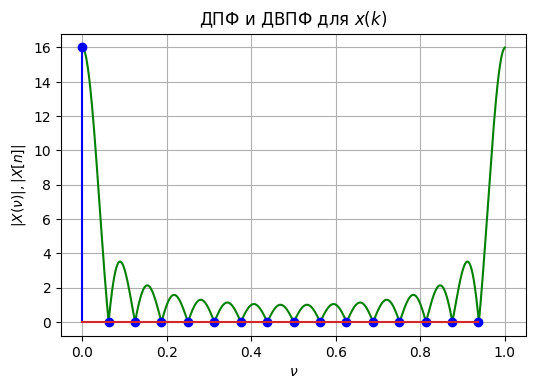

In [6]:
plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs)

### С нулями

In [7]:
dft_values, dft_freqs = dft_abs(x, num_of_zeros=55)
dfft_values, dfft_freqs = dttft_abs(x)

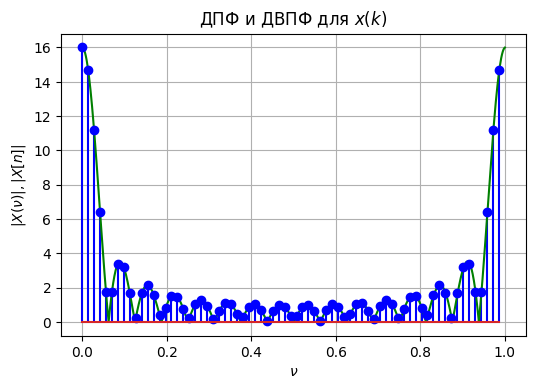

In [8]:
plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs)

## №2

Проделайте аналогичные действия для $N$-точечной последовательности $$z(k)=\cos\left(\frac{2\pi k}5\right).$$

Как изменяться ДВПФ спектр последовательности с увеличением числа точек $N$? 

In [9]:
x=np.cos(2*np.pi/5*np.arange(num_of_counts))

In [10]:
dft_values, dft_freqs = dft_abs(x, num_of_zeros=30)
dfft_values, dfft_freqs = dttft_abs(x)

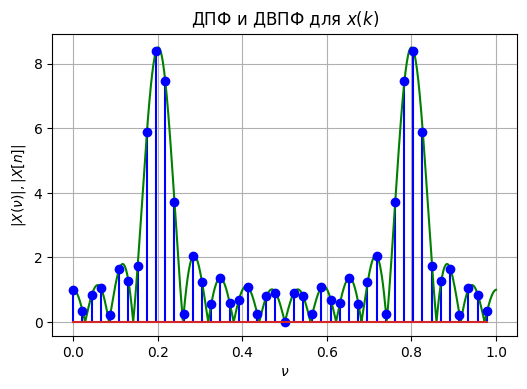

In [11]:
plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs)

При увеличении числа точек максимумы сужаются.

## №3
Рассмотрите две последовательности, каждая из которых состоит из двух косинусоид с разными относительными частотами: 
$$x_1(k)=\cos\left(\frac{\pi k}{4}\right)+\cos\left(\frac{17\pi k}{64}\right) =
\cos\left(2\pi k \frac{8}{64}\right)+\cos\left(2\pi k \frac{8.5}{64}\right)
$$
$$x_2(k)=\cos\left(\frac{\pi k}{4}\right)+\cos\left(\frac{21\pi k}{64}\right) =
\cos\left(2\pi k \frac{8}{64}\right)+\cos\left(2\pi k \frac{10.5}{64}\right)
$$
Предположим, что делается оценка спектра с помощью N=64 точечного ДПФ. Укажите, в каком случае спектральные компоненты будут различимы, а в каком нет. Приведите обоснование результата. 

Реализуйте вычисления в Python, приведите также результат после интерполяции нулевыми отсчетами.  

Повторите вычисления для N=128. Как размер прямоугольного временного окна влияет на результат? 

### Для N=64

In [12]:
num_of_counts=64

In [13]:
x1 = np.cos(np.pi/4 * np.arange(num_of_counts)) + np.cos(17*np.pi * np.arange(num_of_counts)/64)

In [14]:
dft_values, dft_freqs = dft_abs(x1)
dfft_values, dfft_freqs = dttft_abs(x1)

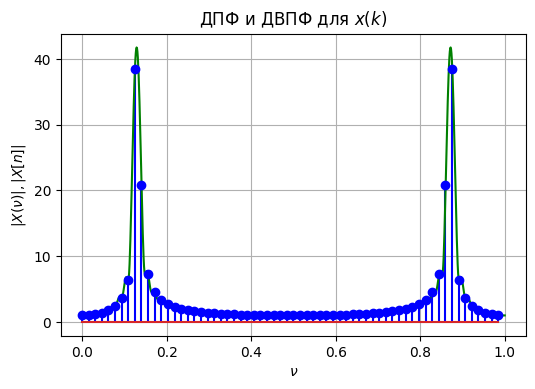

In [15]:
plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs)

### Для N=128

In [16]:
num_of_counts=128

In [17]:
x1 = np.cos(np.pi/4 * np.arange(num_of_counts)) + np.cos(17*np.pi * np.arange(num_of_counts)/64)

In [18]:
dft_values, dft_freqs = dft_abs(x1)
dfft_values, dfft_freqs = dttft_abs(x1)

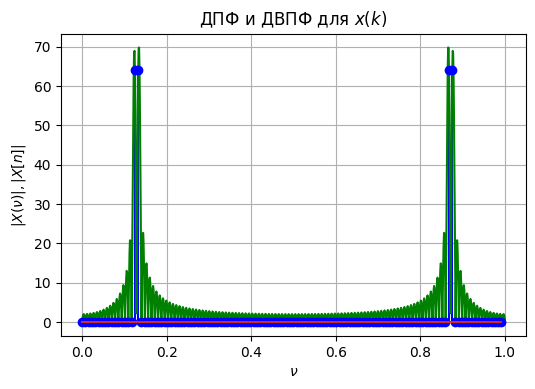

In [19]:
plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs)

In [20]:
num_of_counts = 64

In [21]:
x2 = np.cos(np.pi/4 * np.arange(num_of_counts)) + np.cos(21*np.pi/64 * np.arange(num_of_counts))

In [22]:
dft_values, dft_freqs = dft_abs(x2, num_of_zeros=50)
dfft_values, dfft_freqs = dttft_abs(x2)

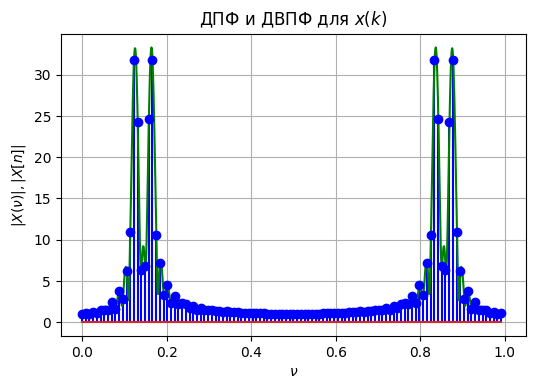

In [23]:
plot_both(dft_values, dft_freqs, dfft_values, dfft_freqs)

Для различимости пиков необходимо, чтобы шаг ДПФ $1/N$ был меньше расстояния между пиками: $\Delta \nu \geq 1/N$

## №4

**Теоретическая часть**

Определить ДВПФ для следующих окон для ДПФ:

* прямоугольное 
$$
w_1=\left\{\begin{array}{l}
1, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq 0\};
\end{array}\right.
$$
* треугольное (окно Бартлетта) 
$$
w_2=\left\{\begin{array}{l}
1-\dfrac{2|k-N/2|}{N}, \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq 0\};
\end{array}\right.
$$
*  Ханна
$$
w_3=\left\{\begin{array}{l}
\dfrac{1}{2} (1-\cos\dfrac{2\pi k}{N}), \; 0 \leq k < N,
\\
0, \{k<0\} \cup \{k\geq 0\};
\end{array}\right.
$$

Определить ширину главного лепестка на нулевом уровне для каждого из окон.
Выразить через ДВПФ спектр оконной функции ДВПФ для последовательности $x(k)=\cos(\dfrac{\pi k}{4})+\cos(\dfrac{21 \pi k}{64})$, взвешанной окном $w(k)$ (произвольным из $w_1(k)$, $w_2(k)$, $w_3(k)$), $N=64$.

**Практическая часть**

Вывести график ДВПФ при $-0.5 \leq \nu\leq 0.5$ для последовательностей $x(k)w_1(k)$, $x(k)w_2(k)$ и $x(k)w_3(k)$. Объяснить различия между графиками. На всех ли графиках спектральные компонеты различимы?

## Теоретическая часть

Прямоугольное окно

\begin{equation}
    W_1(\nu) = \sum_{k=-\infty}^{+\infty} x_N(k)e^{-2\pi j\nu k} = \sum_{k=0}^{N-1}x(k)e^{-2\pi j\nu k} = e^{-j\left(N - 1\right)\pi \nu} \frac{\sin(N\pi \nu)}{\sin(\pi \nu)}
\end{equation}

\begin{equation}
    |W_1(\nu)| = \left |\frac{\sin(N\pi \nu)}{\sin(\pi \nu)} \right|
\end{equation}

Ширина лепестка - $2/N$

Треугольное окно

Данное окно длины $N$ можно рассматривать как свёртку двух прямоугольных окон длины $N/2$:
\begin{equation}
w_2^{'}(k) = \frac{1}{N} \sum_{m=-N/2}^{N/2} w_1(m) w_1(k-m)
\end{equation}
\begin{equation}
W_2(\nu) = \frac{2}{N}  e^{-j\left(N - 1\right)\pi \nu} \left(\frac{\sin(N\pi \nu/2)}{\sin(\pi \nu)} \right)^{2}
\end{equation}

Ширина лепестка - $4/N$

Окно Ханна
\begin{equation}
W_3(\nu) = \frac{1}{2}Q_{N}({\nu}) - \frac{1}{4}Q_{N} \left({\nu - \frac{1}{N}} \right) - \frac{1}{4}Q_{N} \left({\nu + \frac{1}{N}} \right)
\end{equation}

\begin{equation}
Q_N(\nu) =  e^{-j\left(N - 1\right)\pi \nu} \left(\frac{\sin(N\pi \nu/2)}{\sin(\pi \nu)} \right)
\end{equation}

Ширина лепестка - $4/N$

Далее определим через ДВПФ спектр оконной функции ДВПФ для последовательности $x(k)=\cos(\dfrac{\pi k}{4})+\cos(\dfrac{21 \pi k}{64})$, взвешанной окном $w_1(k)$ :

Пусть $x_1(k) = \cos(2\pi k\dfrac{1}{8})$, $x_2(k) = \cos(2\pi k\dfrac{21\pi k}{128})$

Рассмотрим  спектр произведения сигналов:
\begin{equation}
y_1(k) = x_1(k) w(k) = \left(\frac{1}{2} \exp(j 2\pi k \nu_1) + \frac{1}{2} \exp(-j 2\pi k \nu_1) \right) w(k)
\end{equation}

Далее воспользуемся теоремой смещения и линейностью ДВПФ :
\begin{equation}
Y_1(\nu) = \frac{1}{2} \left(W(\nu + \nu_1) + W(\nu - \nu_1) \right)
\end{equation}

Далее воспользуемся теоремой смещения и линейностью ДВПФ :
\begin{equation}
Y_2(\nu) = \frac{1}{2} \left(W(\nu + \nu_2) + W(\nu - \nu_2) \right)
\end{equation}

\begin{equation}
Y(\nu) = \frac{1}{2} \left(W \left(\nu + \frac{1}{8} \right) + W \left(\nu - \frac{1}{8} \right) + W \left(\nu + \frac{21}{128} \right) + W \left(\nu - \frac{21}{128} \right)  \right)
\end{equation}


\begin{equation}
W(\nu) = e^{-j\left(N - 1\right)\pi \nu} \frac{\sin(N\pi \nu)}{\sin(\pi \nu)}
\end{equation}

In [24]:
num_of_counts=64

In [25]:
from scipy import signal

In [26]:
x = np.cos(np.pi/4 * np.arange(num_of_counts)) + np.cos(21*np.pi/64 * np.arange(num_of_counts))

In [27]:
w1=signal.boxcar(x.size)
convolved1=x*w1

In [28]:
dft_values, dft_freqs = dft_abs(convolved1, num_of_zeros=0)
dfft_values, dfft_freqs = dttft_abs(convolved1, start=-0.5, stop=0.5, shift=True)

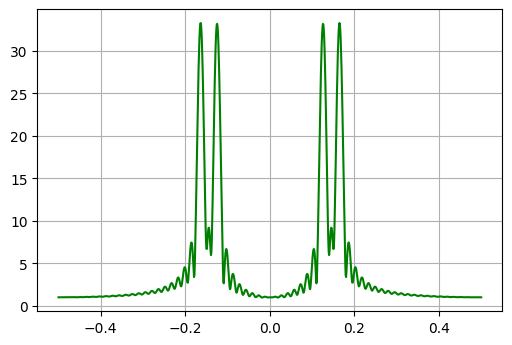

In [29]:
plt.figure(figsize=[6, 4], dpi=100)
plt.plot(dfft_freqs, dfft_values, 'g')
plt.grid()

In [30]:
w2 = signal.bartlett(x.size)

In [31]:
convolved2=x*w2

In [32]:
dft_values, dft_freqs = dft_abs(convolved2, num_of_zeros=0)
dfft_values, dfft_freqs = dttft_abs(convolved2, start=-0.5, stop=0.5, shift=True)

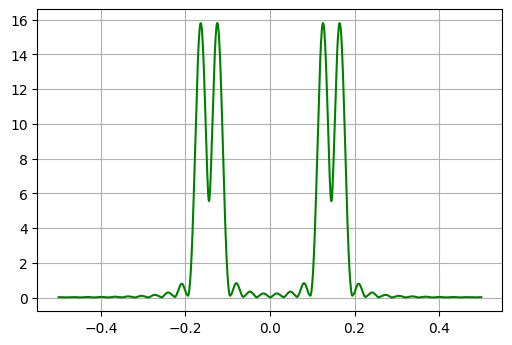

In [33]:
plt.figure(figsize=[6, 4], dpi=100)
plt.plot(dfft_freqs, dfft_values, 'g')
plt.grid()

In [34]:
w3 = signal.hann(x.size)

In [35]:
convolved3=x*w3

In [36]:
dft_values, dft_freqs = dft_abs(convolved3, num_of_zeros=0)
dfft_values, dfft_freqs = dttft_abs(convolved3, start=-0.5, stop=0.5, shift=True)

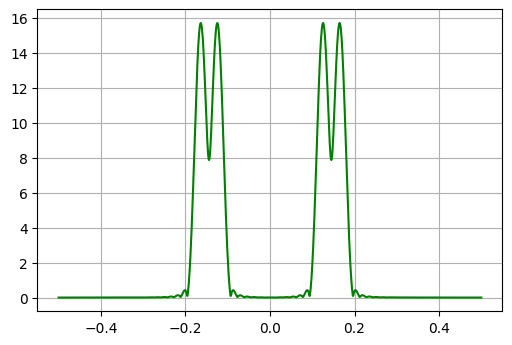

In [37]:
plt.figure(figsize=[6, 4], dpi=100)
plt.plot(dfft_freqs, dfft_values, 'g')
plt.grid()

##  №5*

Имеется аудиозапись сигнала от камертона tuning-fork.wav. Нужно определить по записи эталонную частоту камертона. 
*  Как влияет на результат анализа выбор оконной функции и длина записи?
*  Чему равна частота дискретизаии для этой записи?

Частота дискретизации f = 44100 Гц


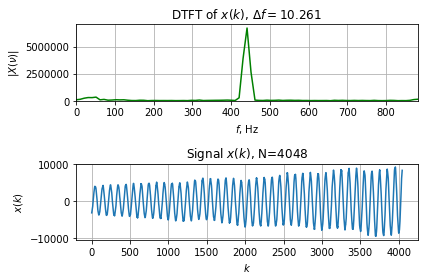

In [39]:
## read file
fs, x=scipy.io.wavfile.read('./tuning-fork.wav')

# extract data
start_idx = 4000
len_of_data = 4048
x=x[start_idx:(start_idx + len_of_data)]

# convolve signal
window = signal.hamming(x.size)
convolved = x * window

# add zeros
num_of_zeros = 250
padded=np.hstack((convolved, np.zeros(num_of_zeros)))

spectrum_values = np.abs(np.fft.fftshift(np.fft.fft(padded, padded.size)))
freqs = (-0.5+(np.arange(padded.size)/padded.size))*fs


plt.subplot(2,1,1)
plt.plot(freqs, spectrum_values, 'g'); 
plt.axis(xmin=0, xmax=fs/50, ymin=0)

plt.title(u'DTFT of $x(k)$, $\Delta f=%.3f $' %(fs/spectrum_values.size))
plt.xlabel(u'$f$, Hz')
plt.ylabel(u'$|X(\\nu)|$')
plt.grid()


plt.subplot(2,1,2)
plt.plot(np.arange(x.size), x)
plt.title(u'Signal $x(k)$, N=%i' %(x.size));
plt.xlabel(u'$k$');
plt.ylabel(u'$x(k)$');
plt.grid()

plt.tight_layout()

print(u'Частота дискретизации f =', fs, 'Гц')

Длина записи влияет на ширину пика. Чем длиннее запись, тем уже пик. Полученная частота - 441 Гц.

In [40]:
max_idx = np.argmax(spectrum_values[spectrum_values.size//2:])

In [41]:
freqs[max_idx + spectrum_values.size//2]

441.20521172638246

## Контрольные вопросы

* Сколько дополнительных нулей нужно добавить к $N$-точечной последовательности $x(k) = 1$, чтобы получить двукратное увеличение числа отчетов? Сколько для четырехкратного?

Для двухкратного - $N$, для четырехкратного - $3N$

* Почему при добавлении нулевых отсчетов не изменяется ДВПФ?

Т.к. добавление нулей лишь добавляет в сумму нулевые слагаемые.

* Чему на рассмотренных в задании графиках равно расстояние между отсчетами ДПФ, если по частотной оси расположены нормированные частоты (обозначаемые $ν$)? Как изменится результат, если на соответствующей оси привести частоты в герцах (обозначаемых $f$) или в рад/с (обозначаемых $ω$)?

Для нормированных частот - $1/N$, для частот - $f_d/N$,для  $ω$ - $2\pi f_d/N$

* Пусть известно ДВПФ $X(ν)$ некоторой $N$-точечной последовательности $x(k)$. Определим $M$-точечное ДПФ как 

\begin{equation}
Y (m) = \frac{1}{M} X(ν = m/M), m = 0, 1, 2, ..., M − 1.
\end{equation}

 * Обратное ДПФ от $Y (m)$ обозначим через $y(k)$. Эта $M$-точечная последовательность как-то связана с $x(k)$. Установить эту связь. Показать, что $x(k)$ может быть полностью восстановлена из $y(k)$, только если $M \geq N$.

Рассмотрим преобразование вида 
\begin{equation}
y(k) = \frac{1}{M} \sum_{n=0}^{M - 1}X(ν = n/M) e^{j\frac{2\pi n k}{M}}
\end{equation}

\begin{equation}
X(ν = n/M) = \sum_{k=-\infty}^{+\infty} x(k)e^{-j \frac{2\pi n k}{M}}
\end{equation}

\begin{equation}
y(k) = \frac{1}{M} \sum_{n=0}^{M - 1}\sum_{l=-\infty}^{+\infty} x(l)e^{-j \frac{2\pi jn l}{M}} e^{j\frac{2\pi n k}{M}}
\end{equation}

\begin{equation}
y(k) = \frac{1}{M} \sum_{n=0}^{M - 1}\sum_{l=0}^{N - 1} x(l)e^{ \frac{2\pi j}{M} n(k -l)}
\end{equation}

\begin{equation}
\sum_{n=0}^{M - 1}e^{ \frac{2\pi j}{M} n(k -l)} = 
\begin{array}{l}
M, \; k = l,
\\
0, k \neq l
\end{array}
\end{equation}

Таким образом
\begin{equation}
x(k) = y(k), k = 0..M-1
\end{equation}